<a href="https://colab.research.google.com/github/sharmilaraj-26/Machine-Learning/blob/main/1818150_ML_LAB_EXP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXP-11 Write a python program to implement Support Vector Machines classifier using credit card data set from kaggle.**

1818107 A.BARATHIRAMAN

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
%matplotlib inline

In [ ]:
df = pd.read_csv('/creditcard.csv') 
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,-0.259295,-0.334931,0.034301,0.180830,0.304219,0.617653,-0.165891,-0.164087,-0.579506,0.310690,-0.209708,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,-1.059102,-0.093860,0.140422,-0.174732,-1.876136,1.068378,1.614986,3.794014,1.704158,-0.606898,-0.049105,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,-0.771700,-0.786274,-0.631577,-0.939768,0.056832,0.817539,0.872867,-0.790431,0.254751,-0.956994,-0.006012,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,1.430341,-1.293415,-1.878013,-0.753629,-0.229368,1.312745,-0.130226,0.431252,0.309580,-0.472422,-0.431134,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0


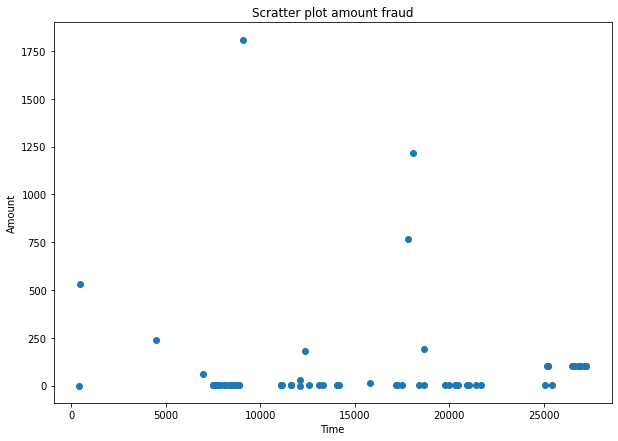

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(10,7))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y = df['Class'] # We create our label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

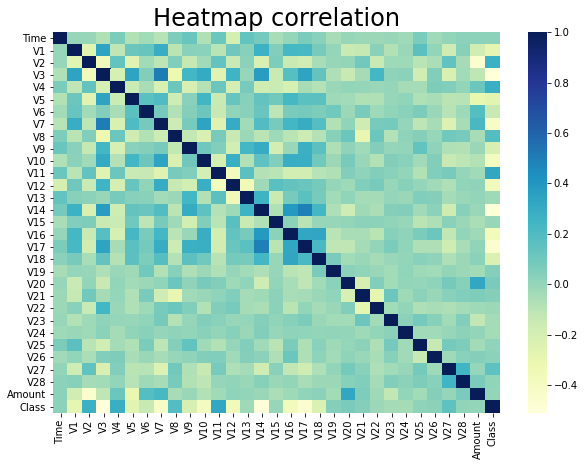

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(10,7))
sb.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sb.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
X_test.dropna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
10548,-1.605223,-0.749286,1.755427,-0.747386,-1.697518,0.880305,1.676917,0.083032,1.427357,-1.603815,1.510591,-1.734310,1.919915,0.967625,-1.817714,0.706831,-0.059473,0.718327,-0.364833,1.127287,0.083441,-0.182780,0.954119,-0.055234,0.107699,0.797875,0.060574,0.168799,500.00
9355,1.232690,0.081679,1.035211,0.383685,-0.945679,-1.068845,-0.361602,-0.226277,1.647526,-0.539977,1.010286,-2.172835,1.739116,1.537990,0.514201,0.412052,0.433657,-0.260506,-0.367805,-0.104605,-0.320102,-0.699642,0.202871,0.682907,-0.059030,0.729493,-0.089513,0.012515,9.98
7572,-0.205146,1.075869,3.052996,3.290205,-0.541646,0.284201,0.220675,-0.212185,0.409707,0.349401,0.839224,-2.107003,2.964947,0.720864,-0.062429,-0.279691,0.787391,0.382050,0.299793,0.280925,0.093472,0.860102,-0.038016,0.913758,-0.608904,0.171058,0.017384,-0.047750,37.92
2334,-1.890852,2.053332,0.119536,1.316923,-0.951631,-0.167768,-0.567282,1.477235,-0.236139,-0.121265,-1.222317,0.025807,-1.158330,1.060261,0.262896,-0.837990,1.185771,-0.455190,0.658033,-0.032094,0.012337,0.093399,0.024060,0.058005,0.040117,-0.203435,0.266618,0.120805,6.49
13173,-0.647623,-0.857912,0.239516,-2.358216,1.598370,3.643715,-0.512286,0.117583,-0.777145,1.811679,0.923473,-4.033300,2.169543,0.628231,0.546896,-0.612447,0.792670,0.685455,1.211605,-0.268062,-0.689821,-0.984723,0.423340,0.884139,-0.587401,-0.526848,-0.651737,-0.176240,57.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11592,1.319495,-0.563372,0.632989,-0.411350,-0.838491,0.001407,-0.870779,0.070479,0.669462,0.265144,2.171465,-2.383897,0.980757,1.309951,-1.610887,0.478533,1.473620,-1.377446,0.673149,-0.066790,-0.102452,0.026277,0.006817,-0.032788,0.413073,-0.267802,-0.003104,-0.008952,5.00
10222,1.333596,-0.855933,0.878028,-0.446917,-1.237259,0.029758,-1.246135,0.007110,1.339850,0.137143,-0.475764,-3.595587,1.379508,0.810304,-0.240019,1.435696,0.777802,-0.389610,0.562867,0.106083,0.121111,0.545623,-0.226135,-0.467296,0.507507,-0.035878,0.009433,0.017047,54.28
4206,-0.524252,0.319682,2.853879,0.720393,-1.116893,0.636925,-0.330602,0.176725,2.484733,-1.242230,-0.433245,-1.619747,2.223584,-0.026940,-2.553511,-0.622193,1.100941,-0.079186,0.366323,-0.087957,-0.160358,0.259708,-0.168392,0.441919,-0.057061,0.497525,-0.057219,0.008933,55.00
6597,-2.323732,-0.685989,2.765060,4.305893,1.929550,-0.303257,-1.615591,0.046934,0.211410,1.150021,-0.105883,-2.500387,3.440441,0.793442,0.409819,1.325217,-0.281484,0.888863,-0.678067,-0.769887,-0.075852,0.677869,-0.877376,-0.065337,-0.640272,0.179457,0.452972,-0.037732,62.56


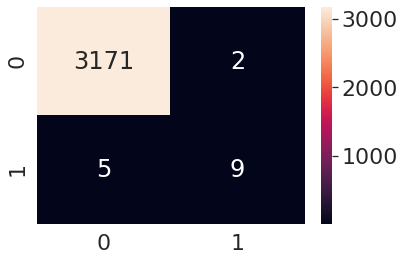

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True,fmt = '')

In [ ]:
accuracy_score(y_pred,y_test)

0.9978035770316912